<a href="https://colab.research.google.com/github/mwinzie/Financial-Outcomes/blob/master/Moringa_Data_Science_Core_W2_Independent_Project_2019_08_Agnes_Mueni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.  Importing Libraries

In [0]:
#importing all the necessary libraries that I will use while carrying out this Independent Project

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt




## Loading the data set

In [0]:
#loading the data from URL and creating a dataframe called finance
finance = pd.read_csv('http://bit.ly/FinancialDataset')


## Reading the data set

In [5]:
#previewing the number of rows and columns that are in the dataset
print((finance.shape[0]), 'rows')
print(finance.shape[1], 'columns')

23524 rows
13 columns


In [0]:
#previewing the first five records of the dataset so as to see what the dataset contains
finance.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
#checking to see the data types of the columns in the data set
finance.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## Cleaning the data set
While tidying the dataset, I shall check for missing data, irrelevant data that may not be needed in the study, check for any syntax errors, outliers and also check for data completeness and uniformity.

In [6]:
#changing all the column names to lower case and replacing all the spaces with '_' to ease in referencing
finance.columns = finance.columns.str.strip().str.replace(' ','_').str.lower()
#previewing the column names to ensure the changes have been effected
finance.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [7]:
#renaming column names that appear to have errors.
finance.rename(columns = {'the_relathip_with_head':'relationship_with_head', 'level_of_educuation':'level_of _education'}, inplace = True)
#checking to see changes have been made
finance.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of _education', 'type_of_job'],
      dtype='object')

In [8]:
#Checking for duplicate values in the dataset
dup = finance.duplicated()
 
print(dup)

#most of the records appear to have repeat values similar to another observation
#therefore deleting the records may affect the final outcome and hence will not delete any of the records and retain them as is

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
23494    False
23495    False
23496    False
23497    False
23498    False
23499    False
23500    False
23501    False
23502    False
23503    False
23504    False
23505    False
23506    False
23507    False
23508    False
23509    False
23510    False
23511    False
23512    False
23513    False
23514    False
23515    False
23516    False
23517    False
23518    False
23519    False
23520    False
23521    False
23522    False
23523    False
Length: 23524, dtype: bool


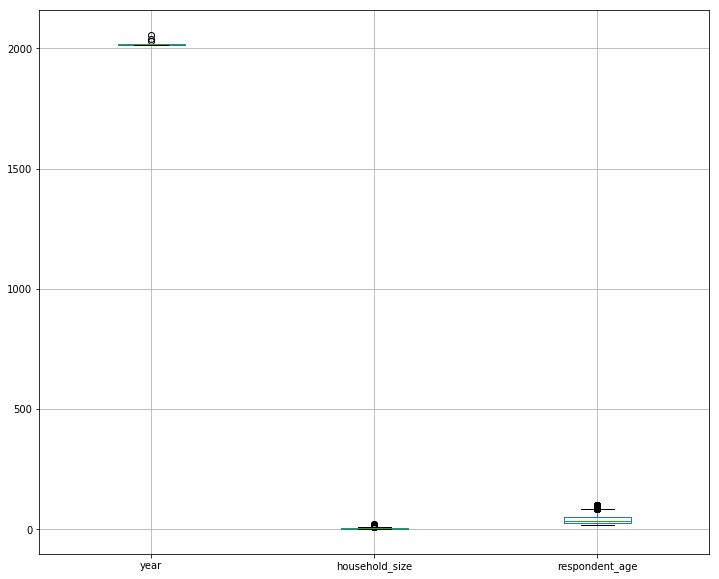

In [9]:
#checking the dataset for outliers
finance.boxplot(figsize = (12,10))
#year,household_size and respondent age have outliers

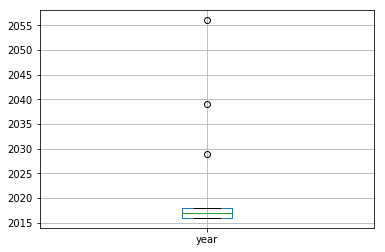

In [0]:
#checking the column 'year' for outliers
finance.boxplot(['year'])

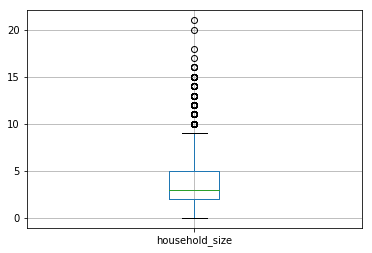

In [0]:
#checking the column 'household_size' for outliers
finance.boxplot(['household_size'])

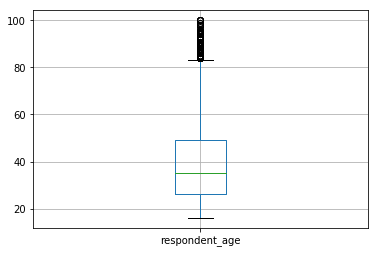

In [0]:
#checking the column 'respondent_age' for outliers
finance.boxplot(['respondent_age'])

In [10]:
finance.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [11]:
#median value for the year column
finance.year.median()

2017.0

In [12]:
#checking for the index of the outliers in the year column
finance.loc[finance['year'].isin([2029,2056,2039])]


,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of _education,type_of_job
213,Kenya,2029,uniqueid_214,No,Urban,Yes,6.0,16.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
308,Kenya,2056,uniqueid_309,Yes,Urban,Yes,4.0,40.0,Male,Head of Household,Married/Living together,Tertiary education,Formally employed Private
7014,Rwanda,2039,uniqueid_947,No,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [0]:
#for the year column, i shall replace the outliers with the median value of the column year which is 2017.
#213,308 and 7014 are the columns where the year has been replaced by the median value
finance.loc[213,'year'] = 2017
finance.loc[308,'year'] = 2017
finance.loc[7014,'year'] = 2017

In [14]:
#checking to see the changes have been made so as to remain with the years under study
finance.year.unique()

array([2018, 2017, 2016])

In [15]:
#iterating through all columns for unique values in the dataset
for i in finance.columns:
  #to print a line in between the columns
  print('\n')
  print(finance[i].unique())



['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']


[2018 2017 2016]


['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']


['Yes' 'No' nan]


['Rural' 'Urban' nan]


['Yes' 'No' nan]


[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]


[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  nan  93.  74.  88.
  90.  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.
  99. 100.]


['Female' 'Male' nan]


['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives' nan]


['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know' nan]


['Secondary education' '

In [16]:
#seeing as the dataset has outliers, first I shall check for the null values 
#in the dataset
finance.isna().sum()


country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
level_of _education       29
type_of_job               30
dtype: int64

In [17]:
#the nan values seem not to be many
#I opt for the option of dropping all the nan values in the dataset and 
#creating a new dataframe financeone

financeone = finance.dropna()
#previewing the first five recoreds in the dataset
financeone.head(5)

,country,year,uniqueid,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of _education,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [18]:
#confirming that the new dataset has no nan values
#they all show sum of 0, hence no nan values in the dataset
financeone.isna().sum()

country                   0
year                      0
uniqueid                  0
has_a_bank_account        0
type_of_location          0
cell_phone_access         0
household_size            0
respondent_age            0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
level_of _education       0
type_of_job               0
dtype: int64

## Univariate analysis





### Frequency Distribution

In [19]:
#Frequency table of the dataset using cross tab between country and has a bank account column
#financeone.value_counts()
frequencies = pd.crosstab(index=financeone["country"], columns=[financeone["has_a_bank_account"]],margins = True)
frequencies

has_a_bank_account,No,Yes,All
country,,,
Kenya,4544,1520,6064
Rwanda,7687,997,8684
Tanzania,5901,599,6500
Uganda,1914,181,2095
All,20046,3297,23343


In [0]:
#from the table above, 4544 kenyans don't have a bank account while 1520 kenyans do have an account
#7687 Rwandese do not have a bank account while 997 have accounts
#5901 Tanzanians do not have an account while 599 do have accounts
#1914 Ugandans dont have a bank account while only 181 have accounts
#Rwanda has more people with no bank accounts while Kenya has the highest number of people with bank accounts  

In [20]:
frequency = pd.crosstab(index=financeone["gender_of_respondent"], columns=[financeone["has_a_bank_account"]],margins = True)
frequency

has_a_bank_account,No,Yes,All
gender_of_respondent,,,
Female,12287,1480,13767
Male,7759,1817,9576
All,20046,3297,23343


In [0]:
#12287 females do not have bank accounts compared to 7759 males
#1480 females have bank accounts compared to 1870 males
#both genders combined, only 3297 have bank accounts with majority of the respondents not owning one

### Bar Charts and Histograms
This will show distribution from grouping segments together


In [21]:
financeone.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of _education', 'type_of_job'],
      dtype='object')

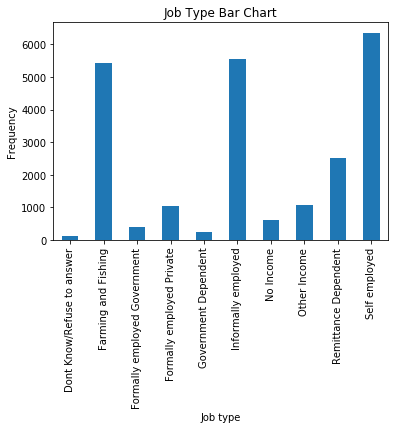

In [38]:
#A bar graph showing the distribution of the type of job column
financeone['type_of_job'].value_counts().sort_index().plot.bar()
plt.title('Job Type Bar Chart')
plt.xlabel('Job type')
plt.ylabel('Frequency')
plt.show()

Most of the population fall under self employed job category followed by informally employed, farming and fishing. The least job category with few population are the peole who fall under the don't know/refuse to answer category

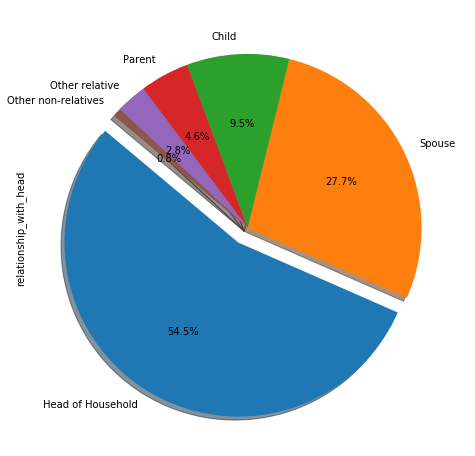

In [81]:
explode = (0.1,0,0,0,0,0)
financeone.relationship_with_head.value_counts().plot.pie(autopct = '%1.1f%%', explode = explode,shadow = True, startangle = 140,figsize= (15,8))

Most of the population have 

In [71]:

financeone.relationship_with_head.value_counts()

Head of Household      12730
Spouse                  6471
Child                   2221
Parent                  1069
Other relative           663
Other non-relatives      189
Name: relationship_with_head, dtype: int64

In [0]:
# Assigning our columns to population and age variables
rship_with_head = financeone['relationship_with_head']
#cell_phone_access= financeone['cell_phone_access']

# Plotting our pie chart
# -------
plt.pie(rship_with_head, labels = cell_phone_access, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Relationship with Head')
plt.show()

# Bivariate Analysis

In [0]:
#graph between having a bank account and type of jom
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(12,10)})
# create a countplot
sns.countplot('has_a_bank_account',data=economic,hue = 'type_of_job')
# Remove the top and down margin
sns.despine(offset=10, trim=True)